In [1]:
#Import Dependencies

import pandas as pd
import numpy as np

from config import CSV_FILE_URL
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier

# Read in the CSV

In [4]:
df = pd.read_csv(CSV_FILE_URL)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Cleaning

In [8]:
# Drop the null columns 
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.shape

(284807, 31)

There are no null values

# Data Exploration

In [13]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


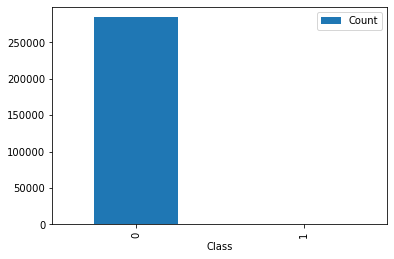

In [12]:
grouped_df = df[['Class','Time']].groupby('Class').count()
grouped_df = grouped_df.rename(columns={"Time":"Count"})
grouped_df.plot(kind="bar")

We can see from the plot above that the data is highly imbalanced. There are only 492 fraudulent out of 284,315 transactions, or 0.17%.

# Defining Features

In [15]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
# Selecting predictor values
selected_features = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
selected_features.shape

(284807, 30)

In [19]:
# Defining predictor and target features to X and y respectively.
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (284807, 30) (284807, 1)


# Create a Train Test Split

In [21]:
# Using sklearn's 'train_test_split' to split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
print('Shape: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (213605, 30) (213605, 1) (71202, 30) (71202, 1)


# Data Pre-processing


In [23]:
# Scale the data
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

# Train the model

In [25]:
AdaBoost = AdaBoostClassifier()
AdaBoost

AdaBoostClassifier()

In [26]:
AdaBoost.fit(X_train_scaled, y_train.flatten())

AdaBoostClassifier()

In [27]:
print(f"Training Data Score: {AdaBoost.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {AdaBoost.score(X_test_scaled, y_test)}")

Training Data Score: 0.999246272325086
Testing Data Score: 0.999283727985169


In [28]:
# Make predictions with the model
AdaBoostPredictions = AdaBoost.predict(X_test_scaled)

In [29]:
AdaBoostPredictProba = AdaBoost.predict_proba(X_test_scaled)[:,1]

In [30]:
# Print classification report
print(classification_report(y_test.flatten(), AdaBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
print("Accuracy:", accuracy_score(y_test.flatten(), AdaBoostPredictions))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.81      0.72      0.76       113

      accuracy                           1.00     71202
     macro avg       0.90      0.86      0.88     71202
  weighted avg       1.00      1.00      1.00     71202

Accuracy: 0.999283727985169


Ada Boost Classifier
Accuracy:  0.999283727985169
Precision:  0.81
Recall:  0.7168141592920354
F1-Score:  0.7605633802816901
AUC score:  0.8582734443437909
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.81      0.72      0.76       113

      accuracy                           1.00     71202
     macro avg       0.90      0.86      0.88     71202
  weighted avg       1.00      1.00      1.00     71202



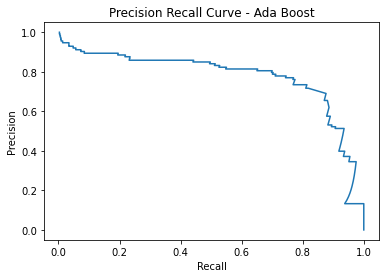

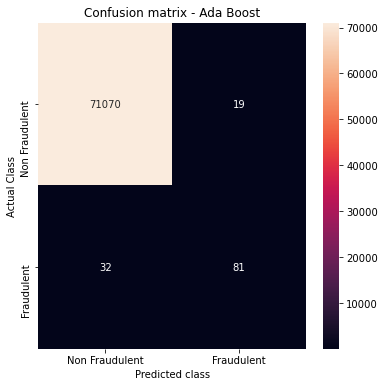

In [34]:
print("Ada Boost Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), AdaBoostPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), AdaBoostPredictions))
print("Recall: ",recall_score(y_test.flatten(), AdaBoostPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), AdaBoostPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), AdaBoostPredictions))
print(classification_report(y_test.flatten(), AdaBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), AdaBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Ada Boost')

confusionMatrix = confusion_matrix(y_test.flatten(), AdaBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Ada Boost") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

# Hyperparameter Tuning

In [35]:
AdaBoost.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [37]:
# Create GridsearchCV model
AdaBoostParamGrid = {'algorithm': ['SAMME', 'SAMEE.R'],
                    'n_estimators': [50,100,150,200]}
AdaBoostGrid = GridSearchCV(AdaBoost, AdaBoostParamGrid, verbose=3)

In [38]:
# Train the model with GridSearch
AdaBoostGrid.fit(X_train_scaled, y_train.flatten())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] algorithm=SAMME, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... algorithm=SAMME, n_estimators=50, score=0.999, total= 1.2min
[CV] algorithm=SAMME, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] .... algorithm=SAMME, n_estimators=50, score=0.999, total=  55.1s
[CV] algorithm=SAMME, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min remaining:    0.0s


[CV] .... algorithm=SAMME, n_estimators=50, score=0.999, total=  45.8s
[CV] algorithm=SAMME, n_estimators=50 ................................
[CV] .... algorithm=SAMME, n_estimators=50, score=0.999, total=  45.8s
[CV] algorithm=SAMME, n_estimators=50 ................................
[CV] .... algorithm=SAMME, n_estimators=50, score=0.999, total=  45.4s
[CV] algorithm=SAMME, n_estimators=100 ...............................
[CV] ... algorithm=SAMME, n_estimators=100, score=0.999, total= 1.6min
[CV] algorithm=SAMME, n_estimators=100 ...............................
[CV] ... algorithm=SAMME, n_estimators=100, score=0.999, total= 1.5min
[CV] algorithm=SAMME, n_estimators=100 ...............................
[CV] ... algorithm=SAMME, n_estimators=100, score=0.999, total= 1.5min
[CV] algorithm=SAMME, n_estimators=100 ...............................
[CV] ... algorithm=SAMME, n_estimators=100, score=0.999, total= 1.5min
[CV] algorithm=SAMME, n_estimators=100 ...............................
[CV] .

C:\Users\nmbur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nmbur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nmbur\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 440, in fit
    raise ValueError("algorithm %s is not supported" % self.algorithm)
ValueError: algorithm SAMEE.R is not supported

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV] ... algorithm=SAMEE.R, n_estimators=100, score=nan, total=   0.0s
[CV] algorithm=SAMEE.R, n_estimators=100 .............................
[CV] ... algorithm=SAMEE.R, n_estimators=100, score=nan, total=   0.0s
[CV] algorithm=SAMEE.R, n_estimators=100 .............................
[CV] ... algorithm=SAMEE.R, n_estimators=100, score=nan, total=   0.0s
[CV] algorithm=SAMEE.R, n_estimators=100 .............................
[CV] ... algorithm=SAMEE.R, n_estimators=100, score=nan, total=   0.0s
[CV] algorithm=SAMEE.R, n_estimators=150 .............................
[CV] ... algorithm=SAMEE.R, n_estimators=150, score=nan, total=   0.0s
[CV] algorithm=SAMEE.R, n_estimators=150 .............................
[CV] ... algorithm=SAMEE.R, n_estimators=150, score=nan, total=   0.0s
[CV] algorithm=SAMEE.R, n_estimators=150 .............................
[CV] ... algorithm=SAMEE.R, n_estimators=150, score=nan, total=   0.0s
[CV] algorithm=SAMEE.R, n_estimators=150 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 37.9min finished


GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMEE.R'],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [39]:
print(AdaBoostGrid.best_params_)
print(AdaBoostGrid.best_score_)

{'algorithm': 'SAMME', 'n_estimators': 200}
0.9992415907867326


In [40]:
# Make predictions with hyperparameter tuned model
AdaBoostGridPredictions = AdaBoostGrid.predict(X_test_scaled)

In [41]:
# Print Classification Report
print(classification_report(y_test.flatten(), AdaBoostGridPredictions,
                           target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.80      0.74      0.77       113

      accuracy                           1.00     71202
     macro avg       0.90      0.87      0.89     71202
  weighted avg       1.00      1.00      1.00     71202



In [43]:
hypertunedAdaBoostModel = AdaBoostClassifier(algorithm = 'SAMME', n_estimators = 100)
hypertunedAdaBoostModel

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

In [44]:
hypertunedAdaBoostModel.fit(X_train_scaled, y_train.flatten())

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

In [45]:
print(f"Training Data Score: {hypertunedAdaBoostModel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {hypertunedAdaBoostModel.score(X_test_scaled, y_test)}")

Training Data Score: 0.9991620046347229
Testing Data Score: 0.9992135052386169


In [46]:
hypertunedAdaBoostModelPredictions = hypertunedAdaBoostModel.predict(X_test_scaled)

In [ ]:
hypertunedAdaB